#**About Dataset**
The Headphones Selling Price dataset is a comprehensive collection of information used to analyze and predict the pricing trends in the consumer electronics market, specifically focusing on headphones. This dataset includes various feature variables that contribute to the final selling price of a headphone model, enabling the application of machine learning techniques to understand and forecast pricing patterns.

### Feature Variables:

1. **Model**: The specific model of the headphone, which may indicate its generation, features, and target market.
   
2. **Company**: The brand or manufacturer of the headphones, which can influence consumer perception and pricing.

3. **Color**: The color variant of the headphones, potentially impacting consumer choice and price due to aesthetic preferences.

4. **Type**: The category or type of headphones (e.g., in-ear, over-ear, wireless), affecting functionality and price.

5. **Average Rating**: The average user rating for the headphones, reflecting customer satisfaction and influencing the perceived value.

6. **Number of Ratings**: The total number of ratings received by the headphones, providing insight into their popularity and reliability.

7. **Maximum Retail Price (MRP)**: The listed retail price set by the manufacturer, serving as a benchmark for discounts and final pricing.

8. **Discount**: The reduction applied to the MRP, influencing the final selling price and often used as a competitive pricing strategy.

This dataset provides a rich foundation for developing machine learning models aimed at predicting the selling price based on these attributes, enabling businesses to optimize pricing strategies, understand market trends, and cater to consumer preferences effectively.

In [366]:
import warnings
warnings.filterwarnings('ignore')

#**Importing Libraries**

In [367]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Flipkart%20Headphones.csv")
df

,Model,Company,Color,Type,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount
0,5PLUS 5PHP28 Wired without Mic Headset,5PLUS,Red,On the Ear,3.6,101,496,3399,2903
1,A R Wireless compatible with Headset Bluetooth...,A R,Red,Multicolor,3.9,35280,188,799,611
2,Aerizo Wireless Touch R100 Earbuds (Black) Blu...,Aerizo,Black,True Wireless,4.0,1934,589,1298,709
3,Allmusic powerful driven bass with dynamic bea...,Allmusic,Multicolor,In the Ear,4.0,15841,260,1599,1339
4,Allmusic OPP.O Ultra HD Sound Premium Bass Spo...,Allmusic,Black,In the Ear,3.8,10766,270,999,729
...,...,...,...,...,...,...,...,...,...
995,zofia 2EARBUD Bluetooth Headset,zofia,Black,True Wireless,4.2,38,1299,2999,1700
996,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.8,6,202,800,598
997,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.3,7,202,800,598
998,ZSIV BT-22 SUPER BASS Grey With Long Life Batt...,ZSIV,Black,In the Ear,4.0,6245,449,1699,1250


#**Descibing the dataset**

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1000 non-null   object 
 1   Company               1000 non-null   object 
 2   Color                 1000 non-null   object 
 3   Type                  1000 non-null   object 
 4   Average Rating        1000 non-null   float64
 5   Number of Ratings     1000 non-null   int64  
 6   Selling Price         1000 non-null   int64  
 7   Maximum Retail Price  1000 non-null   int64  
 8   Discount              1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [369]:
df.describe()

,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,3.831000,5.004075e+04,832.875000,2423.043000,1590.168000
std,0.467459,1.572297e+05,812.535141,1774.025318,1341.379254
min,1.000000,0.000000e+00,88.000000,0.000000,-2991.000000
25%,3.600000,1.167500e+02,349.000000,1079.750000,697.500000
50%,3.900000,1.712000e+03,599.000000,1999.000000,1390.500000
75%,4.000000,1.332700e+04,999.000000,2999.000000,2250.000000
max,5.000000,1.299042e+06,7990.000000,16999.000000,12000.000000


#**Preprocessing as per requirement**

##**Product MRP can never be zero**

In [370]:
df.query("`Maximum Retail Price` <= 0")

,Model,Company,Color,Type,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount
75,Aroma NB133B Straight Wireless Earbuds Bluetoo...,Aroma,Black,True Wireless,3.7,0,699,0,-699
237,Boult Audio FluidX Bluetooth Headset,Boult,Black,On the Ear,5.0,0,1199,0,-1199
257,Boult Audio AirBass Xpods TWS Earbuds with 20H...,Boult,Black,True Wireless,5.0,0,1299,0,-1299
407,"FIER FGN-K1B,K1W Pack 2bluetooth,headphone Blu...",FIER,Black,White,3.3,0,217,0,-217
418,FIER MGNT_k1-2 Bluetooth Headset Bluetooth wit...,FIER,Black,True Wireless,1.0,0,228,0,-228
595,N2B MAGNET-K1-I7 Pack of 3 Bluetooth Bluetooth...,N2B,Black,White,3.0,0,421,0,-421
648,Oxhox Wireless compatible with 4G redmi Blueto...,Oxhox,Red,Black,5.0,0,147,0,-147
755,SONY MDR-EX155AP Gaming Earphones Clear Sound ...,SONY,Black,In the Ear,5.0,0,1290,0,-1290
866,U&I Leather Series 100hours Music Time Bluetoo...,U&I,Red1,In the Ear,3.4,0,899,0,-899
915,WeCool Moonwalk Mini in ear bluetooth Earbuds ...,WeCool,Black,Yellow,3.9,18893,849,0,-849


In [371]:
df.drop(df[df['Maximum Retail Price'] <= 0].index, axis=0,inplace=True)
df

,Model,Company,Color,Type,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount
0,5PLUS 5PHP28 Wired without Mic Headset,5PLUS,Red,On the Ear,3.6,101,496,3399,2903
1,A R Wireless compatible with Headset Bluetooth...,A R,Red,Multicolor,3.9,35280,188,799,611
2,Aerizo Wireless Touch R100 Earbuds (Black) Blu...,Aerizo,Black,True Wireless,4.0,1934,589,1298,709
3,Allmusic powerful driven bass with dynamic bea...,Allmusic,Multicolor,In the Ear,4.0,15841,260,1599,1339
4,Allmusic OPP.O Ultra HD Sound Premium Bass Spo...,Allmusic,Black,In the Ear,3.8,10766,270,999,729
...,...,...,...,...,...,...,...,...,...
995,zofia 2EARBUD Bluetooth Headset,zofia,Black,True Wireless,4.2,38,1299,2999,1700
996,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.8,6,202,800,598
997,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.3,7,202,800,598
998,ZSIV BT-22 SUPER BASS Grey With Long Life Batt...,ZSIV,Black,In the Ear,4.0,6245,449,1699,1250


##**Visualizing the outliers in dataset**

<Axes: ylabel='Average Rating'>

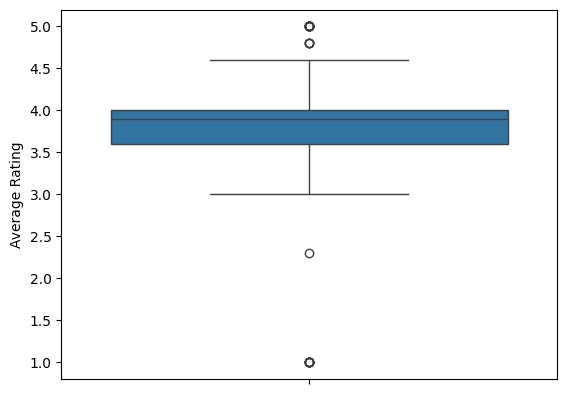

In [372]:
import seaborn as sns
sns.boxplot(df['Average Rating'])

<Axes: xlabel='Average Rating', ylabel='Density'>

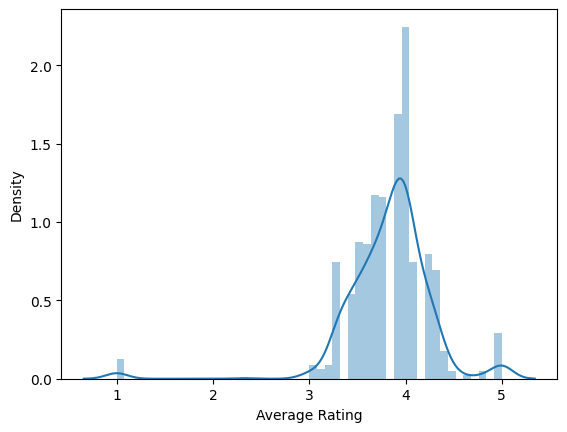

In [373]:
sns.distplot(df['Average Rating'])

In [374]:
q1 = df['Average Rating'].quantile(0.25)
q3 = df['Average Rating'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

In [375]:
df['Average Rating'] = np.where(df['Average Rating'] > max, max, np.where(df['Average Rating'] < min, min, df['Average Rating']))

<Axes: ylabel='Average Rating'>

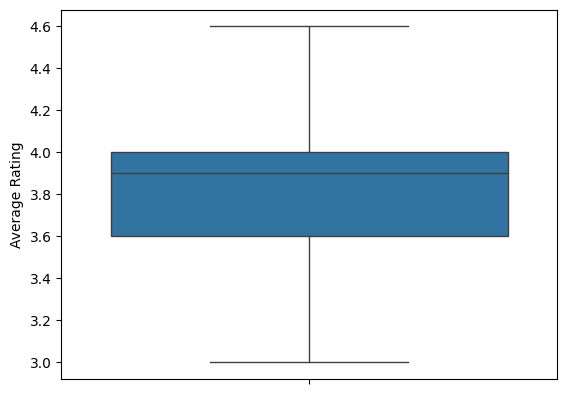

In [376]:
sns.boxplot(df['Average Rating'])

<Axes: ylabel='Number of Ratings'>

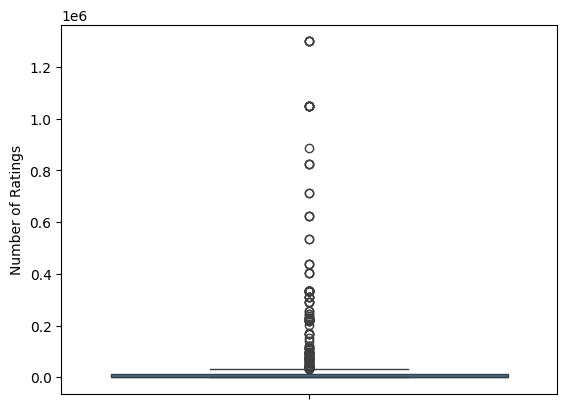

In [377]:
sns.boxplot(df['Number of Ratings'])

<Axes: xlabel='Number of Ratings', ylabel='Density'>

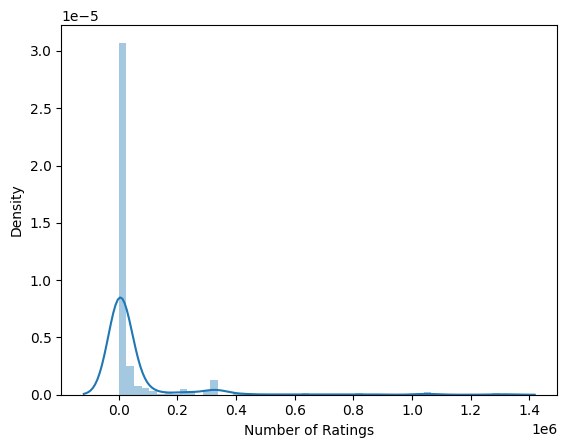

In [378]:
sns.distplot(df['Number of Ratings'])

In [379]:
q1 = df['Number of Ratings'].quantile(0.25)
q3 = df['Number of Ratings'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

In [380]:
df['Number of Ratings'] = np.where(df['Number of Ratings'] > max, max, np.where(df['Number of Ratings'] < min, min, df['Number of Ratings']))

<Axes: ylabel='Number of Ratings'>

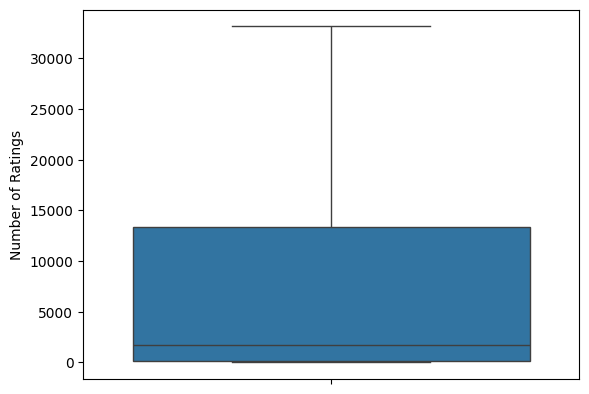

In [381]:
sns.boxplot(df['Number of Ratings'])

<Axes: ylabel='Discount'>

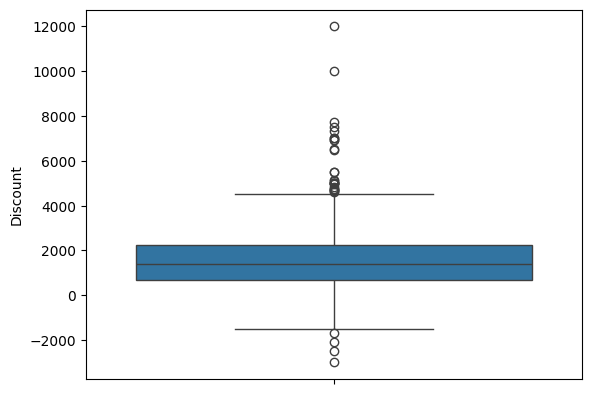

In [382]:
sns.boxplot(df['Discount'])

<Axes: xlabel='Discount', ylabel='Density'>

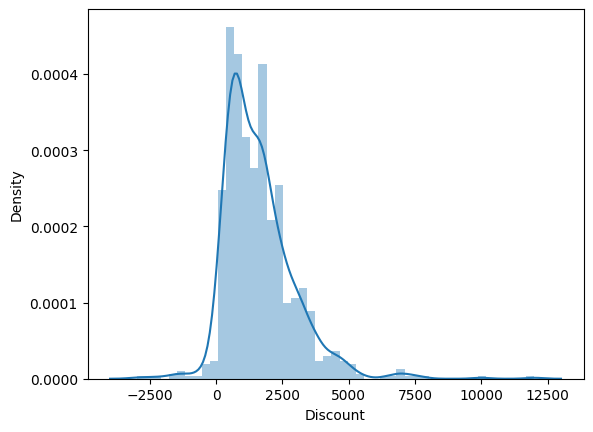

In [383]:
sns.distplot(df['Discount'])

In [384]:
q1 = df['Discount'].quantile(0.25)
q3 = df['Discount'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

In [385]:
df['Discount'] = np.where(df['Discount'] > max, max, np.where(df['Discount'] < min, min, df['Discount']))

<Axes: ylabel='Discount'>

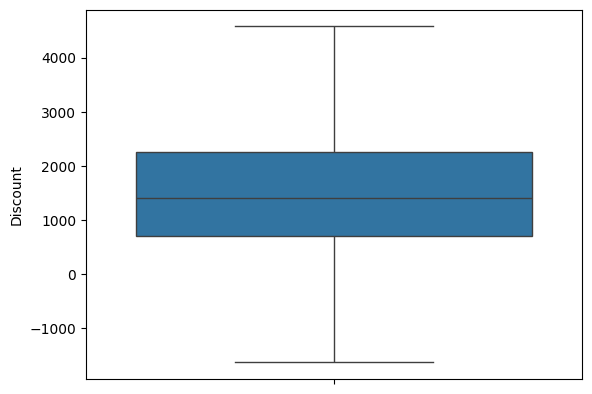

In [386]:
sns.boxplot(df['Discount'])

<Axes: ylabel='Maximum Retail Price'>

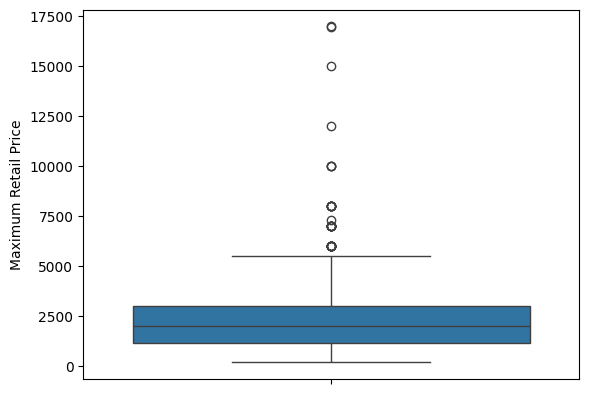

In [387]:
sns.boxplot(df['Maximum Retail Price'])

<Axes: xlabel='Maximum Retail Price', ylabel='Density'>

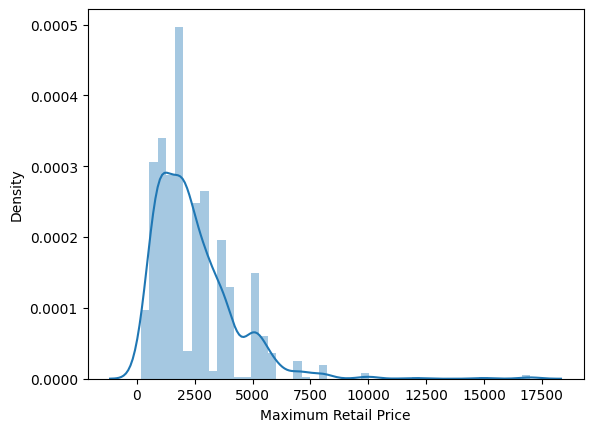

In [388]:
sns.distplot(df['Maximum Retail Price'])

In [389]:
q1 = df['Maximum Retail Price'].quantile(0.25)
q3 = df['Maximum Retail Price'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

In [390]:
df['Maximum Retail Price'] = np.where(df['Maximum Retail Price'] > max, max, np.where(df['Maximum Retail Price'] < min, min, df['Maximum Retail Price']))

<Axes: ylabel='Maximum Retail Price'>

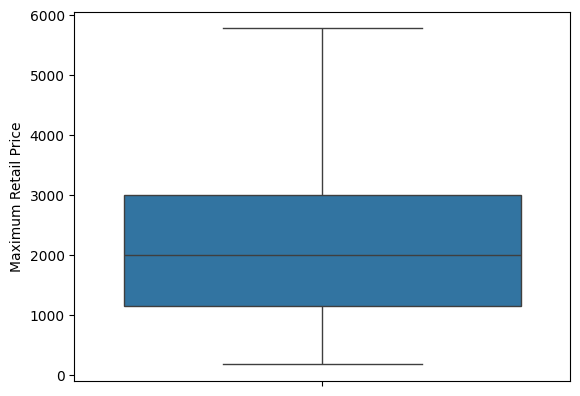

In [391]:
sns.boxplot(df['Maximum Retail Price'])

<Axes: ylabel='Selling Price'>

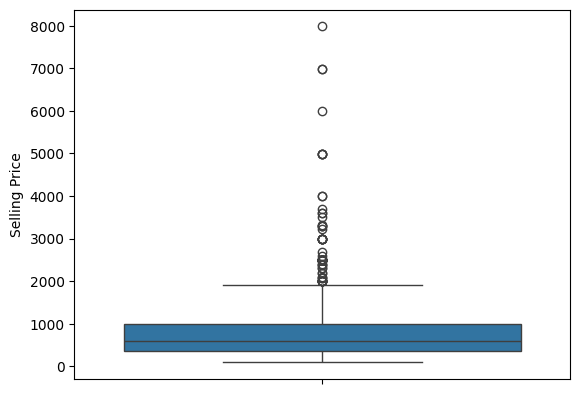

In [392]:
sns.boxplot(df['Selling Price'])

<Axes: xlabel='Selling Price', ylabel='Density'>

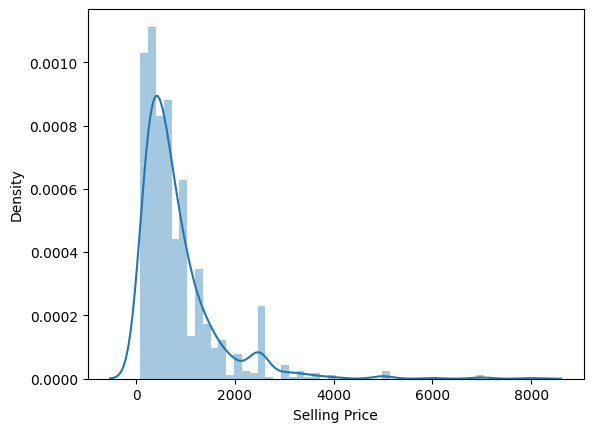

In [393]:
sns.distplot(df['Selling Price'])

In [394]:
q1 = df['Selling Price'].quantile(0.25)
q3 = df['Selling Price'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

In [395]:
df['Selling Price'] = np.where(df['Selling Price'] > max, max, np.where(df['Selling Price'] < min, min, df['Selling Price']))

<Axes: ylabel='Selling Price'>

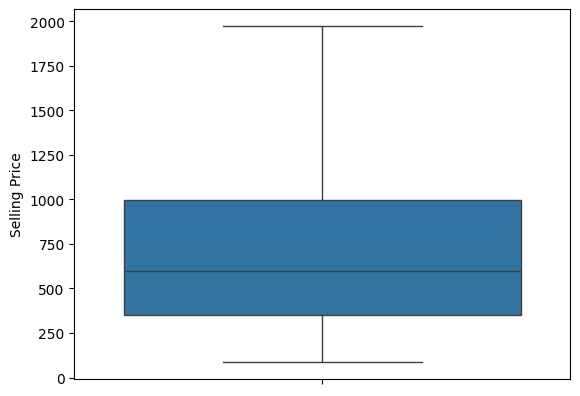

In [396]:
sns.boxplot(df['Selling Price'])

In [397]:
df

,Model,Company,Color,Type,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount
0,5PLUS 5PHP28 Wired without Mic Headset,5PLUS,Red,On the Ear,3.6,101.000,496.0,3399.0,2903.0
1,A R Wireless compatible with Headset Bluetooth...,A R,Red,Multicolor,3.9,33138.625,188.0,799.0,611.0
2,Aerizo Wireless Touch R100 Earbuds (Black) Blu...,Aerizo,Black,True Wireless,4.0,1934.000,589.0,1298.0,709.0
3,Allmusic powerful driven bass with dynamic bea...,Allmusic,Multicolor,In the Ear,4.0,15841.000,260.0,1599.0,1339.0
4,Allmusic OPP.O Ultra HD Sound Premium Bass Spo...,Allmusic,Black,In the Ear,3.8,10766.000,270.0,999.0,729.0
...,...,...,...,...,...,...,...,...,...
995,zofia 2EARBUD Bluetooth Headset,zofia,Black,True Wireless,4.2,38.000,1299.0,2999.0,1700.0
996,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.6,6.000,202.0,800.0,598.0
997,ZOYASLIX Best Sam_sung ys Hendfree S6 FOR J4/J...,ZOYASLIX,White,In the Ear,4.3,7.000,202.0,800.0,598.0
998,ZSIV BT-22 SUPER BASS Grey With Long Life Batt...,ZSIV,Black,In the Ear,4.0,6245.000,449.0,1699.0,1250.0


##**Encoding the categorical variables**

In [398]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(dtype = np.int64)
df[['Model', 'Company', 'Color', 'Type']] =  oe.fit_transform(df[['Model', 'Company', 'Color', 'Type']])

##**Checking for duplicate values**

In [399]:
df.duplicated().sum()

53

In [400]:
df.drop_duplicates(inplace=True)

In [401]:
df.duplicated().sum()

0

#**Preprocessed Dataset**

In [402]:
df

,Model,Company,Color,Type,Average Rating,Number of Ratings,Selling Price,Maximum Retail Price,Discount
0,0,0,71,6,3.6,101.000,496.0,3399.0,2903.0
1,1,1,71,5,3.9,33138.625,188.0,799.0,611.0
2,14,9,8,10,4.0,1934.000,589.0,1298.0,709.0
3,18,10,57,4,4.0,15841.000,260.0,1599.0,1339.0
4,16,10,8,4,3.8,10766.000,270.0,999.0,729.0
...,...,...,...,...,...,...,...,...,...
995,587,201,8,10,4.2,38.000,1299.0,2999.0,1700.0
996,500,177,88,4,4.6,6.000,202.0,800.0,598.0
997,500,177,88,4,4.3,7.000,202.0,800.0,598.0
998,501,178,8,4,4.0,6245.000,449.0,1699.0,1250.0


#**Defining target variable(y) and feature variable(x)**

In [403]:
df.columns

Index(['Model', 'Company', 'Color', 'Type', 'Average Rating',
       'Number of Ratings', 'Selling Price', 'Maximum Retail Price',
       'Discount'],
      dtype='object')

In [404]:
y = df['Selling Price']
x = df[['Model', 'Company', 'Color', 'Type', 'Average Rating',
       'Number of Ratings', 'Maximum Retail Price', 'Discount']]

#**Train-Test Split**

In [405]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2529)

#**Model Selection**

In [406]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#**Training the model**

In [407]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

#**Testing the model**

In [408]:
y_pred = dtr.predict(x_test)

#**Calculating the metrics**

In [409]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.876357464616857

In [410]:
mean_absolute_error(y_test, y_pred)

84.40425531914893

In [411]:
mean_squared_error(y_test, y_pred)

37195.18439716312